# Linear Regression

In [1]:
# Find Line of Best Fit / Line of Least Squares
# 1. Draw the Regression Line 
# 2. Calculate the distance between each point and line
# 3. Square it
# 4. Add all the squares
# 5. Is this the line of least squares?
# 6. Repeat 1-5 till we find the line of least squares

In [37]:
import pandas as pd


In [39]:
# Step 1
dataset=pd.read_csv("salary.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# For x independant Variable, take all the columns from the file, except salary
X=dataset.iloc[:,:-1].values

In [5]:
# For y dependant Variable, take the second column from the file, which is salary
y=dataset.iloc[:,1].values

In [6]:
# Step 2: Split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

In [7]:
# Step 3: Fit Simple Linear Regression to Training Data 
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [16]:
x_train

array([[ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [17]:
y_train

array([ 56642.,  66029.,  64445.,  61111., 113812.,  91738.,  46205.,
       121872.,  60150.,  39891.,  81363.,  93940.,  57189.,  54445.,
       105582.,  43525.,  39343.,  98273.,  67938.,  56957.])

In [8]:
# Step 4: Make Prediction
y_pred=regressor.predict(x_test)
print(y_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


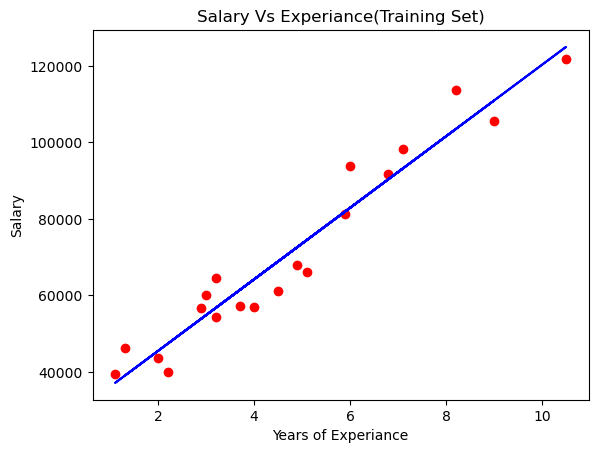

In [9]:
# Step 5: Visualize training set results
import matplotlib.pyplot as plt
# plot the actual data points of training set
plt.scatter(x_train,y_train,color='red')
# plot the regression line
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Salary Vs Experiance(Training Set)')
plt.xlabel('Years of Experiance')
plt.ylabel('Salary')
plt.show()

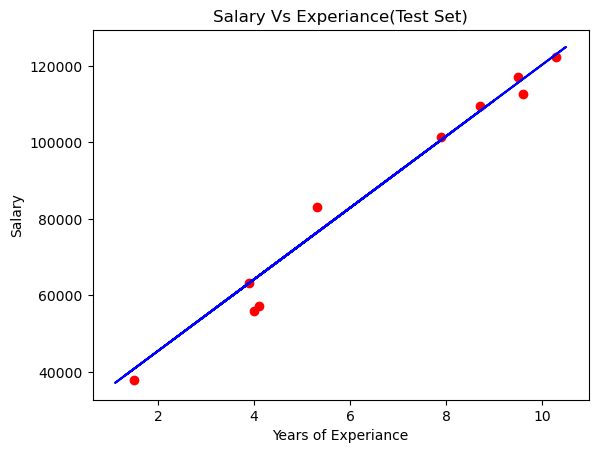

In [11]:
# Step 6: Visualize test set results
# plot the actual data points of test set
plt.scatter(x_test,y_test,color='red')
# plot the regression line (same as above)
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Salary Vs Experiance(Test Set)')
plt.xlabel('Years of Experiance')
plt.ylabel('Salary')
plt.show()

In [14]:
# Step 7: Make new Prediction
new_salary_pred=regressor.predict([[15]])
print('The predicted salary of a person with 15 years experiance is ',new_salary_pred)

The predicted salary of a person with 15 years experiance is  [167005.32889087]


# Multiple Regression

In [21]:
"""
    Output Interpretation
    Value of Intercept is 4.3345, which shows that if we keep the money spent on TV, Radio & Newspaper for 
    advertisment as 0, the estimated average sales will be 4.3345.
    A single Rupee increase in the money spent on TV for advertisment increase sales by 0.0538,
    the money spent on Radio for advertisment increase sales by 0.1100 and
    the money spent on Newspaper for advertisment increase sales by 0.0062
"""
import numpy as np
import seaborn as sns

In [24]:
dataset=pd.read_csv("sales.csv")
dataset.head()

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [25]:
# Setting the value for x and y
X=dataset[['tv','radio','newspaper']]
y=dataset['sales']

In [31]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [32]:
# Fitting the Multiple Linear Regression to Training Data 
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [33]:
x_train

,tv,radio,newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3
...,...,...,...
87,110.7,40.6,63.2
103,187.9,17.2,17.9
67,139.3,14.5,10.2
24,62.3,12.6,18.3


In [34]:
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: sales, Length: 140, dtype: float64

In [38]:
# Intercept and Coefficient
print("Intercept ", mlr.intercept_)
print("Coeefficients ")
'''
    zip used to print the coefficients (slopes) of the linear regression model for each predictor variable (TV, Radio
    Newspaper) along with the respective variable names. This displays the coefficients in a more organized and 
    interpretable format.
    x: Thid represents the Dataframe x that contains the predictor variables (TV, Radio, Newspaper)
    
    mlr.coef_ : This is an attribute of the trained Linear Regression model mlr that contains coefficient for each 
    predictor variable. These coefficients represents the change in the target variable (sales) for a one unit 
    change in each predictor variable with holding the other variable constant.
    
    zip(x,mlr.coef_): The zip function combine the variable names (from x) and their corresponding coefficients
    (from mlr.coef_) into pairs
    list(...): Wrap the pairs in a list, making it easier to print and view the coefficients
'''
print(list(zip(X,mlr.coef_)))

Intercept  4.334595861728433
Coeefficients 
[('tv', 0.053829108667250054), ('radio', 0.11001224388558062), ('newspaper', 0.0062899501461303525)]


In [39]:
# Make Prediction of Test set
y_pred_mlr=mlr.predict(x_test)
print("prediction for test: {}".format(y_pred_mlr))

prediction for test: [ 9.35221067 20.96344625 16.48851064 20.10971005 21.67148354 16.16054424
 13.5618056  15.39338129 20.81980757 21.00537077 12.29451311 20.70848608
  8.17367308 16.82471534 10.48954832  9.99530649 16.34698901 14.5758119
 17.23065133 12.56890735 18.55715915 12.12402775 20.43312609 17.78017811
 16.73623408 21.60387629 20.13532087 10.82559967 19.12782848 14.84537816
 13.13597397  9.07757918 12.07834143 16.62824427  8.41792841 14.0456697
  9.92050209 14.26101605 16.76262961 17.17185467 18.88797595 15.50165469
 15.78688377 16.86266686 13.03405813 10.47673934 10.6141644  20.85264977
 10.1517568   6.88471443 17.88702583 18.16013938 12.55907083 16.28189561
 18.98024679 11.33714913  5.91026916 10.06159509 17.62383031 13.19628335]


In [40]:
# Actual value and the predicted value
mlr_diff=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_mlr})
print(mlr_diff)

     Actual Value  Predicted Value
126           6.6         9.352211
104          20.7        20.963446
99           17.2        16.488511
92           19.4        20.109710
111          21.8        21.671484
167          17.2        16.160544
116          12.2        13.561806
96           16.7        15.393381
52           22.6        20.819808
69           22.3        21.005371
164          11.9        12.294513
124          19.7        20.708486
182           8.7         8.173673
154          20.6        16.824715
125          10.6        10.489548
196          14.0         9.995306
194          17.3        16.346989
177          16.7        14.575812
163          18.0        17.230651
31           11.9        12.568907
11           17.4        18.557159
73           11.0        12.124028
15           22.4        20.433126
41           17.1        17.780178
97           20.5        16.736234
128          24.7        21.603876
133          19.6        20.135321
82           11.3   

In [ ]:
# Model Evaluation
"""
    R Squared : R Square is the coefficient of determination. It tells us how many points fall on the regression line
    The value of R square is 90.11, which indicates that 90.11% of the data fit the regression model.
    Mean absolute Error: It is the absolute difference between the actual or true values and predicted values. The
        lower the value the better is the model's performance. A mean absolute error of 0 means that your model is
        perfect predictor of the outputs.A mean absolute error obtained for this perticular model is 1.227, which is
        pretty good as it is close to the 0.
    Mean square Error: It is calculated by taking the average of the square of the difference between the original
        and predicted values of the data. The lower the value , the better is the model's performance. The mean
        square error obtained for this perticular model is 2.636, which is pretty good
    Root Mean Square Error: It is the standard deviation of the errors which occur when a prediction is made on
        a dataset. This is same as the mean squared error, but the root of the value is considered while determining
        the accurcy of the model. The lower the value, the better is the model's performance. Root Mean Square Error
        btained for this perticular model is 1.623, which is pretty good
"""

In [42]:
from sklearn import metrics
meanAbErr=metrics.mean_absolute_error(y_test,y_pred_mlr)
meanSqErr=metrics.mean_squared_error(y_test,y_pred_mlr)
rootmeansqerr=np.sqrt(metrics.mean_squared_error(y_test,y_pred_mlr))
print("R Squared: {:.2f}".format(mlr.score(X,y)*100))
print('Mean Absolute Error: ',meanAbErr)
print('Mean Square Error: ',meanSqErr)
print('Root Mean Square Error: ',rootmeansqerr)

R Squared: 90.11
Mean Absolute Error:  1.2278183566589411
Mean Square Error:  2.6360765623280664
Root Mean Square Error:  1.6235998775338911


In [43]:
print(y_test)

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    17.2
116    12.2
96     16.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    20.6
125    10.6
196    14.0
194    17.3
177    16.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     20.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65     11.3
151    11.6
162    19.9
170     8.4
77     14.2
32     13.2
173    16.7
174    16.5
85     20.2
168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
46     10.6
75      8.7
28     18.9
29     10.5
195     7.6
40     16.6
153    16.0
115    12.6
64     16.0
59     18.4
1      10.4
192     5.9
136     9.5
152    16.6
161    13.3
Name: sales, dtype: float64


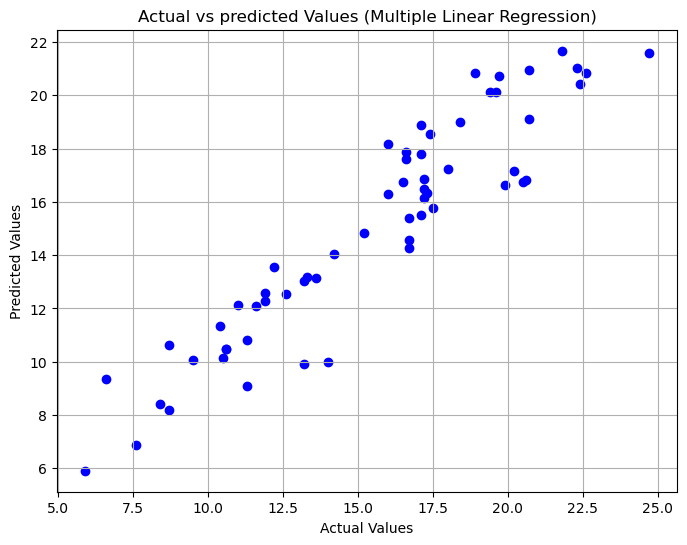

In [44]:
# Plotting actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred_mlr,color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs predicted Values (Multiple Linear Regression)')
plt.grid(True)
plt.show()

# Time Series Analysis

In [3]:
import seaborn as sns

In [4]:
# Find available dataset names in seaborn
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
df=sns.load_dataset("flights")

In [6]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [7]:
# We get only year and month for the date, we need day also
# convert the data to a YYYY-MM-DD format in a new column named yearMonth
df['yearMonth']="01-"+df['month'].astype(str)+"-"+df['year'].astype(str)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   yearMonth   144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB
None


In [8]:
# yearMonth is type of object - we may have problems later, so convert it into datetime
df['yearMonth']=pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearMonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB
None


In [9]:
print(df.head())

   year month  passengers  yearMonth
0  1949   Jan         112 1949-01-01
1  1949   Feb         118 1949-02-01
2  1949   Mar         132 1949-03-01
3  1949   Apr         129 1949-04-01
4  1949   May         121 1949-05-01


In [10]:
# make yearmonth column asthe dataframe index
df.set_index('yearMonth',inplace=True) # inplace will make the change permanent to the DF
print(df.head())

            year month  passengers
yearMonth                         
1949-01-01  1949   Jan         112
1949-02-01  1949   Feb         118
1949-03-01  1949   Mar         132
1949-04-01  1949   Apr         129
1949-05-01  1949   May         121


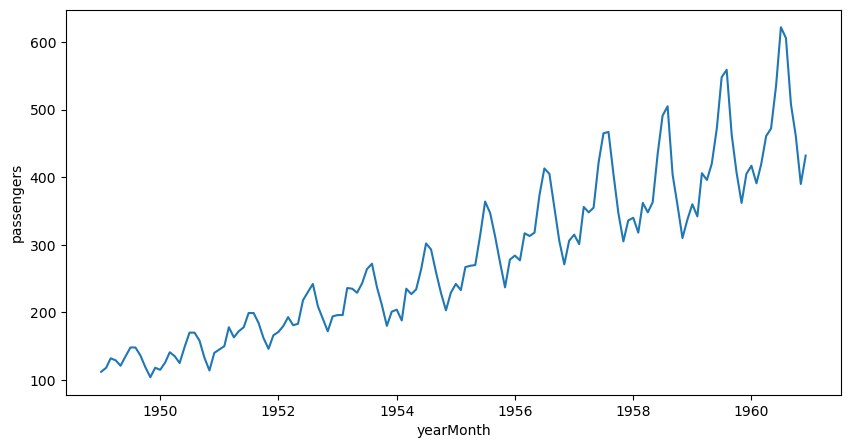

In [13]:
import matplotlib.pyplot as plt
# Now Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)
plt.show()

In [14]:
# The graph will show patterns (e.g. seasonality - data going up and down)
# Refer to the slides for explanation
# We see in our graph two PAtterns: seasonality and Trend

# Calculate and plot rolling mean and standard Deviation for 12 months
df['rollMean']=df.passengers.rolling(window=12).mean()
df['rollStd']=df.passengers.rolling(window=12).std()

In [15]:
print(df['rollMean'])
print(df['rollStd'])

yearMonth
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: rollMean, Length: 144, dtype: float64
yearMonth
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
                ...    
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125
Name: rollStd, Length: 144, dtype: float64


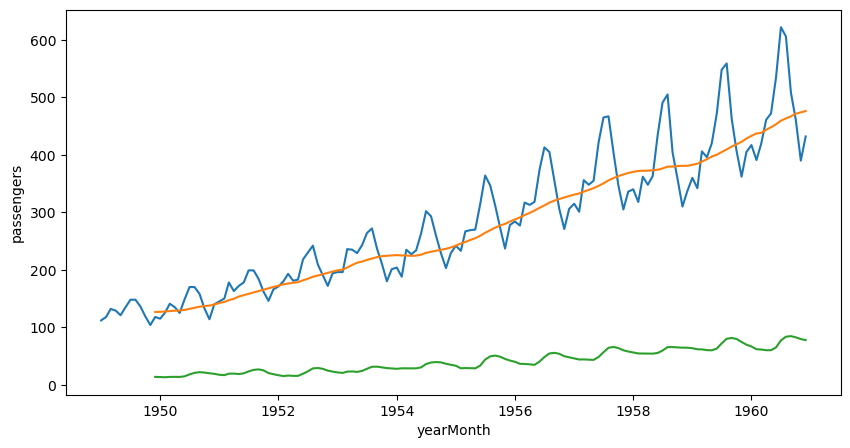

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)
sns.lineplot(data=df,x=df.index,y=df.rollMean)
sns.lineplot(data=df,x=df.index,y=df.rollStd)
plt.show()

In [17]:
# Conclusion: Mean is not stationary, SD stationary; so our data is not stationary

# Now let us perform the ADF Test
from statsmodels.tsa.stattools import adfuller
adfTest=adfuller(df['passengers'])
print(adfTest) # Let us interpret these values below by converting into a series

(0.8153688792060547, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)


In [18]:
stats=pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','no of observations used'])
print(stats)

Test Statistic               0.815369
p-value                      0.991880
#lags used                  13.000000
no of observations used    130.000000
dtype: float64


In [19]:
for key, values in adfTest[4].items():
    print('criticality ',key,":",values)

criticality  1% : -3.4816817173418295
criticality  5% : -2.8840418343195267
criticality  10% : -2.578770059171598


In [20]:
# We will see that our test statistic > Critical value in all the cases, so we do not reject
# the Null Hypothesis(H0 - Data is not Stationary)
# It means our data is not stationary

In [21]:
# To analyse Time-Series Analysis both rollmean and rolldeviation must same(stationary)

In [22]:
# Shift data to make rollmean and rolldeviation stationary

In [23]:
# Time Shift
# log
# Square root, Cube Root,....

In [36]:
# The previous code to test stationarity is now in a function
def test_stationarity(dataframe,var):
    dataframe['rollMean']=dataframe[var].rolling(window=12).mean()
    dataframe['rollStd']=dataframe[var].rolling(window=12).std()
    from statsmodels.tsa.stattools import adfuller
    adfTest=adfuller(dataframe[var])
    stats = pd.Series(adfTest[0:4],
                      index=['Test Statistic','p-value','#lags used',
                             'number of observations used'])
    print(stats)
    for key, values in adfTest[4].items():
        print('criticality ',key,":",values)
    plt.figure(figsize=(10,5))
    sns.lineplot(data=dataframe,x=dataframe.index,y=var)
    sns.lineplot(data=dataframe,x=dataframe.index,y='rollMean')
    sns.lineplot(data=dataframe,x=dataframe.index,y='rollStd')
    plt.show()

In [29]:
air_df=df[['passengers']].copy()
print(air_df.head())

            passengers
yearMonth             
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


In [30]:
# By default, shift is by 1time period (here, one month)
# Create a new column which will contain the shifted value from passengers column - see slide
air_df['shift']=air_df.passengers.shift(10)
air_df['shiftDiff']=air_df['passengers'] - air_df['shift']
print(air_df.head(20))

            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118    NaN        NaN
1949-03-01         132    NaN        NaN
1949-04-01         129    NaN        NaN
1949-05-01         121    NaN        NaN
1949-06-01         135    NaN        NaN
1949-07-01         148    NaN        NaN
1949-08-01         148    NaN        NaN
1949-09-01         136    NaN        NaN
1949-10-01         119    NaN        NaN
1949-11-01         104  112.0       -8.0
1949-12-01         118  118.0        0.0
1950-01-01         115  132.0      -17.0
1950-02-01         126  129.0       -3.0
1950-03-01         141  121.0       20.0
1950-04-01         135  135.0        0.0
1950-05-01         125  148.0      -23.0
1950-06-01         149  148.0        1.0
1950-07-01         170  136.0       34.0
1950-08-01         170  119.0       51.0


/tmp/ipykernel_20814/758248112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollMean']=dataframe[var].rolling(window=12).mean()
/tmp/ipykernel_20814/758248112.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollStd']=dataframe[var].rolling(window=12).std()


Test Statistic                  -3.671914
p-value                          0.004526
#lags used                      13.000000
number of observations used    120.000000
dtype: float64
criticality  1% : -3.486055829282407
criticality  5% : -2.8859430324074076
criticality  10% : -2.5797850694444446


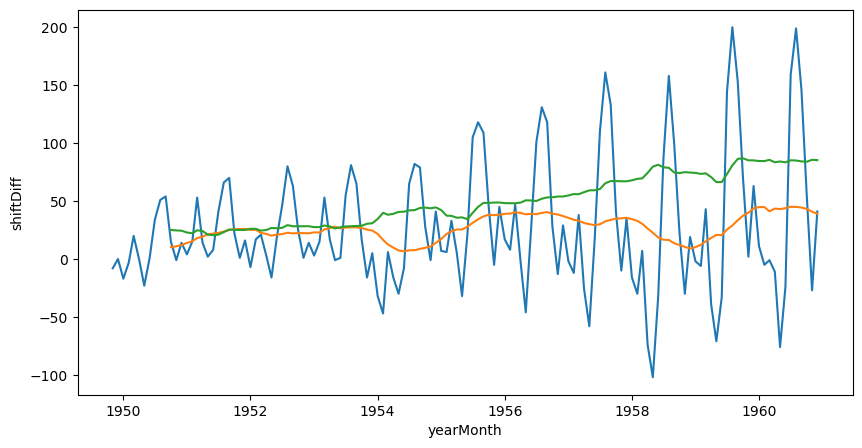

In [31]:
# Test Staionarity
test_stationarity(air_df.dropna(),'shiftDiff')
# Conclusion: The data has become somewhat stationary

In [ ]:
# ARIMA (Autoregressive Integrated Moving Average)
# ARIMA(p,d,q)
# p - Auto regressive (PACF Fn)
# d - Integreted (Shift)
# q - Moving Average (ACF Fn)

In [ ]:
# Auto Correlation Function (ACF)
# Partially Auto Correlation Function (PACF)

In [32]:
# create columns for one month and one year lagged data
airP=df[['passengers']].copy(deep=True)
airP['firstDiff']=airP['passengers'].diff()
airP['Diff12']=airP['passengers'].diff(12) # Thiswill be used later in SARIMAX
print(airP.head())

            passengers  firstDiff  Diff12
yearMonth                                
1949-01-01         112        NaN     NaN
1949-02-01         118        6.0     NaN
1949-03-01         132       14.0     NaN
1949-04-01         129       -3.0     NaN
1949-05-01         121       -8.0     NaN


In [33]:
# Now ARIMA
# In google colab, you may need !pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

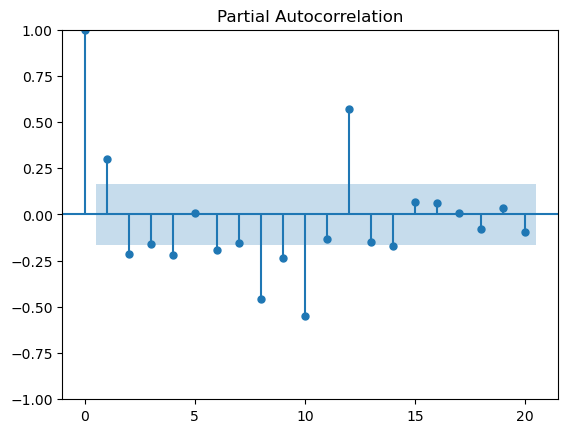

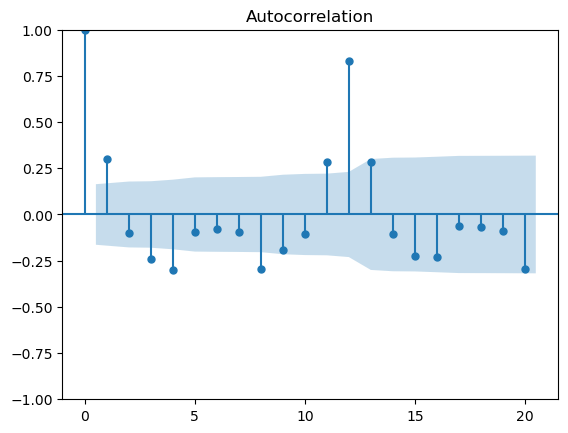

In [34]:
plot_pacf(airP['firstDiff'].dropna(),lags=20)
plt.show()
# Shaded area is insignificant area
# PACF gives us the auto regressive values (i.e. p - refer to the slides)
# First 'p' is 1 (the x-axis coordinate) whose value is ~0.31(the y-axis coordinate)
# So significant p values are 1,2,4,6, etc

# Now let us take this value as p and find q, for which we need ACF
plot_acf(airP['firstDiff'].dropna(),lags=20)
plt.show()

            passengers  firstDiff  Diff12
yearMonth                                
1957-01-01         315        9.0    31.0
1957-02-01         301      -14.0    24.0
1957-03-01         356       55.0    39.0
1957-04-01         348       -8.0    35.0
1957-05-01         355        7.0    37.0
            passengers  firstDiff  Diff12
yearMonth                                
1957-06-01         422       67.0    48.0
1957-07-01         465       43.0    52.0
1957-08-01         467        2.0    62.0
1957-09-01         404      -63.0    49.0
1957-10-01         347      -57.0    41.0


/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            passengers  firstDiff  Diff12   arimaPred
yearMonth                                            
1960-08-01         606      -16.0    47.0  341.111333
1960-09-01         508      -98.0    45.0  341.111333
1960-10-01         461      -47.0    54.0  341.111333
1960-11-01         390      -71.0    28.0  341.111333
1960-12-01         432       42.0    27.0  341.111333


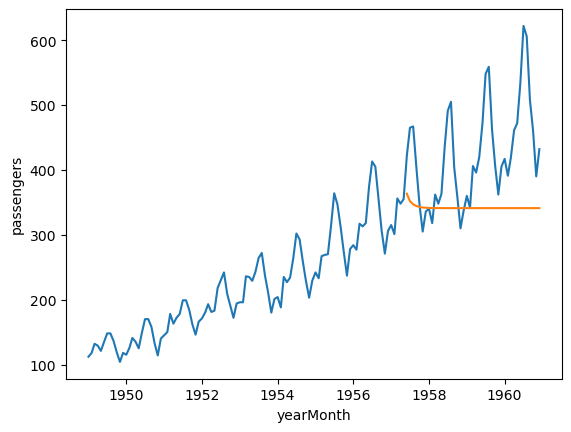

In [35]:

# Results of ACF are similar to that of PACF
# Interpretation: We got q. Significant q values are 1, 3, 4, 8, etc) 

# Let us take p = 1, q = 3 (both are significant) and d = 1 (already known)

# Build ARIMA model
train = airP[:round(len(airP)*70/100)] # Take the first 70% data
print(train.tail()) # Just to check where it ends

test = airP[round(len(airP)*70/100):] # Take the last 30% data, starting from 71%
print(test.head()) # Just to check where it starts

model = ARIMA(train['passengers'],order=(1,1,3)) # Parameters: p, d, q
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['arimaPred'] = prediction
print(airP.tail())

# Plot

sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')
plt.show()

# Conclusion: The ARIMA prediction is not good

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20264D+00    |proj g|=  2.33807D-01

At iterate    5    f=  3.16452D+00    |proj g|=  2.15778D-02

At iterate   10    f=  3.15832D+00    |proj g|=  7.03921D-03

At iterate   15    f=  3.14587D+00    |proj g|=  3.89852D-02

At iterate   20    f=  3.13407D+00    |proj g|=  1.65823D-02

At iterate   25    f=  3.13061D+00    |proj g|=  1.02011D-02

At iterate   30    f=  3.12895D+00    |proj g|=  2.41016D-03

At iterate   35    f=  3.12889D+00    |proj g|=  3.93026D-04

At iterate   40    f=  3.12886D+00    |proj g|=  1.68699D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

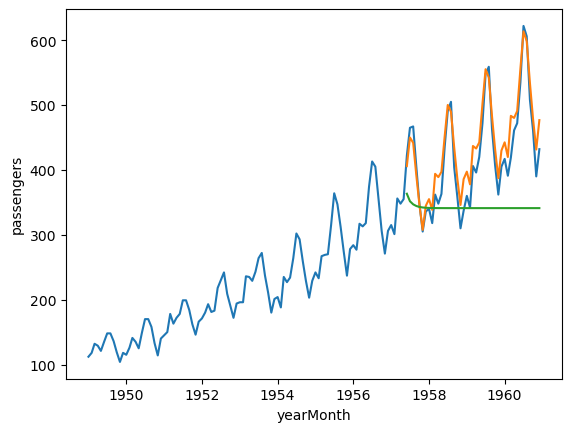

            passengers  firstDiff  Diff12   arimaPred  sarimaxPred
yearMonth                                                         
1960-08-01         606      -16.0    47.0  341.111333   598.363716
1960-09-01         508      -98.0    45.0  341.111333   533.993275
1960-10-01         461      -47.0    54.0  341.111333   478.771929
1960-11-01         390      -71.0    28.0  341.111333   431.417964
1960-12-01         432       42.0    27.0  341.111333   476.780962
Empty DataFrame
Columns: []
Index: [1961-01-01 00:00:00, 1961-02-01 00:00:00, 1961-03-01 00:00:00, 1961-04-01 00:00:00, 1961-05-01 00:00:00]
1961-01-01    490.604296
1961-02-01    465.075270
1961-03-01    532.864243
1961-04-01    530.147727
1961-05-01    541.981664
1961-06-01    612.605207
1961-07-01    674.606989
1961-08-01    657.123909
1961-09-01    588.128530
1961-10-01    528.858570
1961-11-01    478.556992
1961-12-01    526.611794
1962-01-01    541.500522
1962-02-01    513.115404
1962-03-01    585.202665
1962-04-01    5

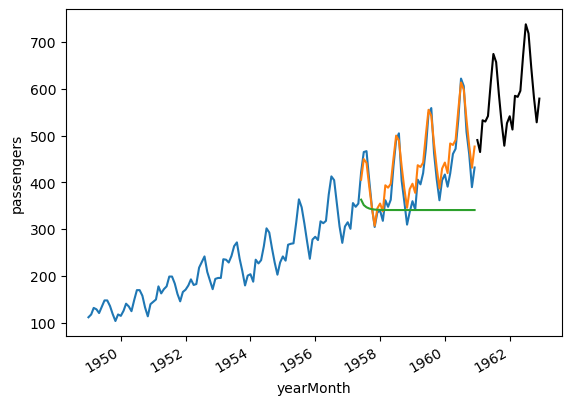

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Now SARIMAX prediction
model = SARIMAX(train['passengers'],order=(1,1,3),seasonal_order=(2,1,2,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['sarimaxPred'] = prediction
print(airP.tail())
# Data looks better

# Plot
airP.dropna()
print(airP.head())
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')
plt.show()

# Compared to ARIMA, SARIMAX is much better

# Future prediction

# First check the last date in our dataset
print(airP.tail())

# MS: Month Start frequency
# Create a data frame to hold index values from 01.01.61 to 01.12.62
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
print(futureDate.head())

# Predict and print
print(model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]))

# Plot

airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')
plt.show()